# Use cases B and C: all-photonic repeaters

In this use case, we consider a quantum network under the following assumptions:
 - Complex all-photonic with a **large number of memories are available**. As an example, we consider repeaters that can decode and encode using a [[48,6,8]] quantum code (this is for practical purposes, to be able to use some values from Niu2022).
 - **Limited number of repeaters $N$** (between each user and the hub). We can space those repeaters (increase $L_0$) to cover more distance (larger $L$) at the cost of reducing $p$. In this case, we can compute an effective signal attenuation parameter $\alpha_\mathrm{eff}$, which is a function of the repeater spacing, and approximate $p$ as $$p = 10^{-\frac{\alpha_\mathrm{eff}(L_0)}{10} 2L},$$ see Eq. 7 and Fig. 4b from Niu2022.

In [1]:
import numpy as np
import math
import importlib as imp
import QCSsimulator as sim
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

In [2]:
# Reference units
clock_cycle = 1 # [us]
speed_light = 0.2 # [km/us] Speed of light in optical fiber

---
---
---

# B0. Find $p(L_0,L)$ (fit data from Niu2022)

Next, we fit $\alpha_\mathrm{eff}$ versus $L_0$ for $\eta_r=0.9$ and the [[48, 6, 8]] code (orange line from Fig 4b from Niu2022). Raw data extracted with WebPlotDigitizer, third order fitting with Plotly ($\alpha_\mathrm{eff} \approx a_1 l_0 + a_2 l_0^2 + a_3 l_0^3$).

WebPlotDigitizer citation: @misc{Rohatgi2022,
  url = {https://automeris.io/WebPlotDigitizer},
  author = {Rohatgi,  Ankit},
  title = {Webplotdigitizer: Version 4.6},
  year = {2022}
}

In [3]:
aeff_vs_L0 = [[0.57366, 0.00049],
            [1.16853, 0.00051],
            [1.79416, 0.00100],
            [2.41976, 0.00195],
            [3.05560, 0.00383],
            [3.72215, 0.00710],
            [4.40911, 0.01362],
            [5.12668, 0.02477],
            [5.86449, 0.04381],
            [6.62259, 0.06934],
            [7.41113, 0.10461],
            [8.23010, 0.14962],
            [9.07915, 0.21503]]

def a_eff(L_0, fitting='fourth-order'):
    if fitting=='third-order':
        a1 = 0.0024237022454138904 # [1/km]
        a2 = -0.001861344427541674 # [1/km^2]
        a3 = 0.000462010533071338 # [1/km^3]
        a4 = 0 # [1/km^4]
    elif fitting=='fourth-order':
        a1 = 0 # [1/km]
        a2 = 0.00027707970095919093 # [1/km^2]
        a3 = 0 # [1/km^3]
        a4 = 0.000028537199832870782 # [1/km^4]
    return a1*L_0 + a2*L_0**2 + a3*L_0**3 + a4*L_0**4

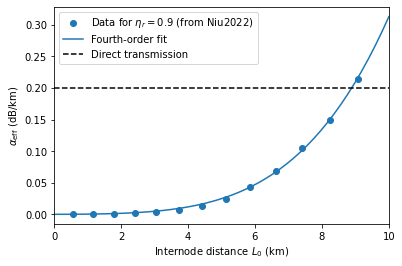

In [4]:
savefig = True
dark = False


if dark==True:
    plt.style.use('dark_background')
    
plt.scatter([x[0] for x in aeff_vs_L0], [x[1] for x in aeff_vs_L0], label='Data for $\eta_r=0.9$ (from Niu2022)')
L0_vec = np.linspace(0,10,50)
plt.plot(L0_vec, a_eff(L0_vec), label='Fourth-order fit')
plt.plot(L0_vec, L0_vec*0+0.2, '--', color='k', label='Direct transmission')

plt.xlim((L0_vec[0],L0_vec[-1]))
plt.xlabel(r'Internode distance $L_0$ (km)')
plt.ylabel(r'$\alpha_\mathrm{eff}$ (dB/km)')
plt.legend()

if savefig:
    if dark==True:
        filename = 'figs/DARK_'
    else:
        filename = 'figs/'
    filename += 'RESULTS-C-alpha_eff.pdf'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

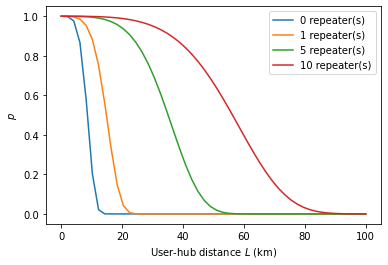

In [5]:
L_vec = np.linspace(0,100,50) # User-hub distance [km]
N_vec = [0,1,5,10] # Total number of repeaters between user and hub

for N in N_vec:
    p_vec = 10**(-a_eff(L_vec/(N+1))*(2*L_vec)/10)
    plt.plot(L_vec, p_vec, label='%d repeater(s)'%N)

plt.xlabel(r'User-hub distance $L$ (km)')
plt.ylabel(r'$p$')
plt.legend()
plt.show()